In [74]:
import numpy as np 
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
filename = Path('data-dsci552.csv')

In [5]:
df = pd.read_csv(filename)
df.head()

,gender,scenario,pitch
0,F,1,213.3
1,F,1,204.5
2,F,2,285.1
3,F,2,259.7
4,F,3,203.9


## Q1: Clean the data

In [7]:
df.shape

(84, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    84 non-null     object 
 1   scenario  84 non-null     int64  
 2   pitch     83 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [9]:
df.isnull().sum()  ## check for missing vals

gender      0
scenario    0
pitch       1
dtype: int64

In [10]:
df2 = df.dropna()
df2.isnull().sum()

gender      0
scenario    0
pitch       0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='scenario'>

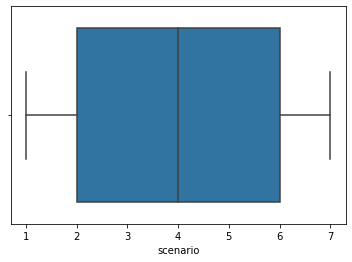

In [13]:
sns.boxplot(df2['scenario'])

In [53]:
## Convert the df to a NORMALIZED numpy array
## i.e. the mean=0
x = df2.iloc[:,[1,2]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [68]:
## find outlers using std dev
alloutliers = []
for col in range(0,2):
    mean, std = np.mean(x_scaled[:,col]), np.std(x_scaled[:,col])
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    outliers = [x for x in x_scaled[:,col] if x < lower or x > upper]
    alloutliers.append(outliers)

In [69]:
alloutliers

[[], []]

## Q2 Histogram

<AxesSubplot:xlabel='scenario', ylabel='Density'>

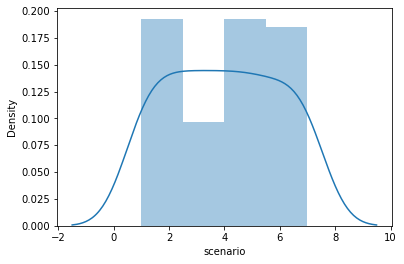

In [86]:
sns.distplot(df2['scenario'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pitch')

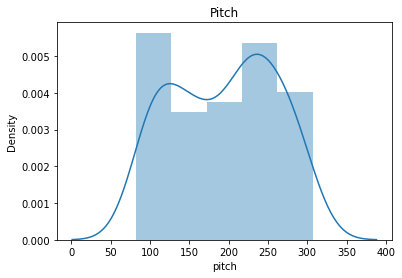

In [88]:
sns.distplot(df2['pitch'])
plt.title('Pitch')

## Q3
Calculate the mean, median, standard deviation for each gender subgroup, as well as for the
entire population. Hint: use the Python library pandas’s .loc[] function to separate data by
gender.

In [90]:
df2.groupby('gender').mean()

,scenario,pitch
gender,,
F,4.00000,246.985714
M,3.95122,138.875610


In [91]:
df2.groupby('gender').median()

,scenario,pitch
gender,,
F,4,248.55
M,4,126.90


In [92]:
df2.groupby('gender').std()

,scenario,pitch
gender,,
F,2.024243,34.618081
M,2.024243,38.928208


## Q4 boxplot by scenario of pitch

In [116]:
df2.head()

,gender,scenario,pitch
0,F,1,213.3
1,F,1,204.5
2,F,2,285.1
3,F,2,259.7
4,F,3,203.9


In [117]:
df_melt = pd.melt(df2, id_vars=['scenario'], value_vars=['pitch'])

In [118]:
df_melt

,scenario,variable,value
0,1,pitch,213.3
1,1,pitch,204.5
2,2,pitch,285.1
3,2,pitch,259.7
4,3,pitch,203.9
...,...,...,...
78,5,pitch,156.5
79,6,pitch,146.7
80,6,pitch,158.0
81,7,pitch,161.1


Text(0, 0.5, 'Pitch')

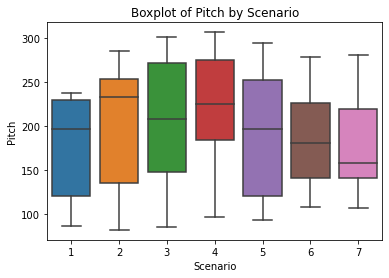

In [121]:
sns.boxplot(y='value', x='scenario', data=df_melt)
plt.title('Boxplot of Pitch by Scenario')
plt.xlabel('Scenario')
plt.ylabel('Pitch')

## Q5
Question 5 (2 points)
Is the variation in pitch due to gender more significant than variation due to context (different
scenarios)? Explain your answer.

Compare variation BETWEEN GROUPS (e.g. female vs male), NOT WITHIN GROUPS!!

Text(0.5, 1.0, 'Boxplot of Pitch by Gender')

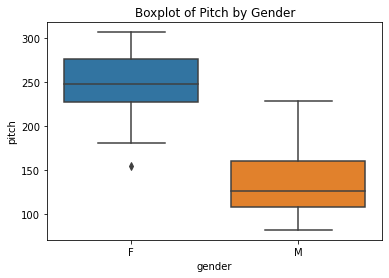

In [156]:
sns.boxplot(y='pitch', x='gender', data=df2)
plt.title('Boxplot of Pitch by Gender')

In [146]:
# stds = df2.groupby('scenario').std().iloc[:,0]
# print(stds)
# max(stds) - min(stds)

In [145]:
# stds = df2.groupby('gender').std().iloc[:,1]
# max(stds) - min(stds)

In [154]:
means1 = df2.groupby('scenario').mean().iloc[:,0]
print(means1)
print("Range between scenario means:", max(means1) - min(means1))

scenario
1    175.908333
2    200.925000
3    206.933333
4    218.416667
5    190.316667
6    182.636364
7    179.025000
Name: pitch, dtype: float64
Range between scenario means: 42.508333333333354


In [155]:
means2 = df2.groupby('gender').mean().iloc[:,1]
print(means2)
print("Range between gender means:", max(means2) - min(means2))

gender
F    246.985714
M    138.875610
Name: pitch, dtype: float64
Range between gender means: 108.11010452961679
